# Imports

In [151]:
import json
import os
import sys
import time
import math
import random
import datetime
from collections import *
import re

from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm, tqdm_pandas
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.lda import LDA
from sklearn.feature_selection import SelectFwe, mutual_info_classif, univariate_selection 
from sklearn.cross_validation import cross_val_predict
from sklearn.decomposition import PCA, NMF, RandomizedPCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import *
import graphviz

%matplotlib inline


In [2]:
pd.set_option("display.max_columns", 100)

In [3]:
sns_palette = sns.color_palette("Blues", n_colors=1)

# Exploration

## Du jeu de données

In [4]:
def explore_object(obj):
    if isinstance(obj, list):
        return random.choice(obj)
    elif isinstance(obj, dict):
        random_key = random.choice(list(obj.keys()))
        return (random_key, obj[random_key])

In [5]:
# Dataset des films ayant au moins 10,000 votes
with open("../data/IMDB_SCRAPED_DATA.json", "r") as f:
    imdb_data = json.load(f)

In [153]:
len(imdb_data)

7168

In [152]:
explore_object(imdb_data)

('tt0466816',
 {'AVERAGERATING': 7.0,
  'AWARDS_NB_OTHER_NOMINATIONS': 15,
  'AWARDS_NB_OTHER_WINS': 9,
  'COMPOSER_1': nan,
  'COMPOSER_2': nan,
  'COMPOSER_3': nan,
  'COMPOSER_4': nan,
  'COUNTRIES_1': 'UK',
  'CRITICS_CRITIC': '86',
  'CRITICS_USER': '48',
  'DETAILS_BUDGET': '£3,800,000',
  'DETAILS_GROSS': '$59,255',
  'DETAILS_RELEASE_DATE': '9 July 2008 (France)',
  'DETAILS_WORLDWIDE_GROSS': None,
  'DIRECTOR_1': 'nm0533284',
  'IS_ACTION': nan,
  'IS_ADULT': nan,
  'IS_ADVENTURE': nan,
  'IS_ANIMATION': nan,
  'IS_BIOGRAPHY': nan,
  'IS_COMEDY': nan,
  'IS_CRIME': nan,
  'IS_DOCUMENTARY': nan,
  'IS_DRAMA': 1.0,
  'IS_FAMILY': nan,
  'IS_FANTASY': nan,
  'IS_FILM-NOIR': nan,
  'IS_GAME-SHOW': nan,
  'IS_HISTORY': nan,
  'IS_HORROR': nan,
  'IS_MUSIC': nan,
  'IS_MUSICAL': nan,
  'IS_MYSTERY': 1.0,
  'IS_NEWS': nan,
  'IS_REALITY-TV': nan,
  'IS_ROMANCE': 1.0,
  'IS_SCI-FI': nan,
  'IS_SHORT': nan,
  'IS_SPORT': nan,
  'IS_TALK-SHOW': nan,
  'IS_THRILLER': nan,
  'IS_WAR': nan

In [7]:
df = pd.DataFrame.from_dict(imdb_data, orient="index")

In [8]:
df.shape

(7168, 95)

In [154]:
df.head()

_METASCORE   WRITER_1                      PRODUCTORS_1  IS_SHORT  \
tt0004972         NaN  nm0228746           David W. Griffith Corp.       NaN   
tt0006864         NaN  nm0000428         Triangle Film Corporation       NaN   
tt0010323         NaN  nm0562346                  Decla-Bioscop AG       NaN   
tt0012349         NaN  nm0000122       Charles Chaplin Productions       NaN   
tt0013442         NaN  nm0831290  Jofa-Atelier Berlin-Johannisthal       NaN   

           IS_MYSTERY  IS_ADULT  CRITICS_USER  IS_MUSIC LANG_2  NUMVOTES  \
tt0004972         NaN       NaN         334.0       NaN    NaN     18549   
tt0006864         NaN       NaN          91.0       NaN    NaN     11646   
tt0010323         1.0       NaN         202.0       NaN    NaN     43970   
tt0012349         NaN       NaN         126.0       NaN    NaN     79354   
tt0013442         NaN       NaN         371.0       NaN    NaN     73759   

           IS_NEWS  RUNTIMEMINUTES  IS_FILM-NOIR DETAILS_BUDGET  IS_WAR  \
tt0004972      NaN           195.0           NaN       $100,000     1.0   
tt0006864      NaN           163.0           NaN       $385,907     NaN   
tt0010323      NaN            76.0           NaN        $18,000     NaN   
tt0012349      NaN            68.0           NaN       $250,000     NaN   
tt0013442      NaN            94.0           NaN            NaN     NaN   

           IS_SPORT  IS_SCI-FI  IS_COMEDY  IS_WESTERN  IS_ANIMATION  \
tt0004972       NaN        NaN        NaN         NaN           NaN   
tt0006864       NaN        NaN        NaN         NaN           NaN   
tt0010323       NaN        NaN        NaN         NaN           NaN   
tt0012349       NaN        NaN        1.0         NaN           NaN   
tt0013442       NaN        NaN        NaN         NaN           NaN   

              STAR_1  IS_HORROR DIRECTOR_1  IS_THRILLER  \
tt0004972  nm0550615        NaN  nm0000428          NaN   
tt0006864  nm0550615        NaN  nm0000428          NaN   
tt0010323  nm0891998        1.0  nm0927468          NaN   
tt0012349  nm0701012        NaN  nm0000122          NaN   
tt0013442  nm0485146        1.0  nm0003638          NaN   

                                                  _STORYLINE     STAR_3  \
tt0004972  \nTwo brothers, Phil and Ted Stoneman, visit t...  nm0001273   
tt0006864  \nIntolerance and its terrible effects are exa...  nm0001196   
tt0010323  \nFrancis, a young man, recalls in his memory ...  nm0470328   
tt0012349  \nThe opening title reads: "A comedy with a sm...  nm0000122   
tt0013442  \nWisbourg, Germany based estate agent Knock d...  nm0775180   

          DETAILS_GROSS  IS_FAMILY COMPOSER_1  IS_BIOGRAPHY PRODUCTORS_3  \
tt0004972   $10,000,000        NaN        NaN           NaN          NaN   
tt0006864           NaN        NaN        NaN           NaN          NaN   
tt0010323           NaN        NaN  nm0005959           NaN          NaN   
tt0012349    $5,450,000        1.0        NaN           NaN          NaN   
tt0013442           NaN        NaN  nm0002302           NaN          NaN   

           IS_ACTION  IS_FANTASY  IS_TALK-SHOW        DETAILS_RELEASE_DATE  \
tt0004972        NaN         NaN           NaN         21 March 1915 (USA)   
tt0006864        NaN         NaN           NaN        12 May 1919 (France)   
tt0010323        NaN         1.0           NaN  27 February 1920 (Germany)   
tt0012349        NaN         NaN           NaN   9 November 1923 (Germany)   
tt0013442        NaN         1.0           NaN           3 June 1929 (USA)   

           IS_ADVENTURE  IS_DRAMA  CRITICS_CRITIC COUNTRIES_1     STAR_2  \
tt0004972           NaN       1.0            84.0         USA  nm0910400   
tt0006864           NaN       1.0            72.0         USA  nm0001273   
tt0010323           NaN       NaN           151.0     Germany  nm0270415   
tt0012349           NaN       1.0            89.0         USA  nm0001067   
tt0013442           NaN       NaN           244.0     Germany  nm0775659   

      

In [10]:
print(sorted(df.columns.tolist()))

['AVERAGERATING', 'AWARDS_NB_OSCAR_NOMINATIONS', 'AWARDS_NB_OSCAR_WON', 'AWARDS_NB_OTHER_NOMINATIONS', 'AWARDS_NB_OTHER_WINS', 'COMPOSER_1', 'COMPOSER_2', 'COMPOSER_3', 'COMPOSER_4', 'COUNTRIES_1', 'COUNTRIES_10', 'COUNTRIES_11', 'COUNTRIES_12', 'COUNTRIES_13', 'COUNTRIES_14', 'COUNTRIES_15', 'COUNTRIES_16', 'COUNTRIES_2', 'COUNTRIES_3', 'COUNTRIES_4', 'COUNTRIES_5', 'COUNTRIES_6', 'COUNTRIES_7', 'COUNTRIES_8', 'COUNTRIES_9', 'CRITICS_CRITIC', 'CRITICS_USER', 'DETAILS_BUDGET', 'DETAILS_GROSS', 'DETAILS_RELEASE_DATE', 'DETAILS_WORLDWIDE_GROSS', 'DIRECTOR_1', 'DIRECTOR_2', 'IS_ACTION', 'IS_ADULT', 'IS_ADVENTURE', 'IS_ANIMATION', 'IS_BIOGRAPHY', 'IS_COMEDY', 'IS_CRIME', 'IS_DOCUMENTARY', 'IS_DRAMA', 'IS_FAMILY', 'IS_FANTASY', 'IS_FILM-NOIR', 'IS_GAME-SHOW', 'IS_HISTORY', 'IS_HORROR', 'IS_MUSIC', 'IS_MUSICAL', 'IS_MYSTERY', 'IS_NEWS', 'IS_REALITY-TV', 'IS_ROMANCE', 'IS_SCI-FI', 'IS_SHORT', 'IS_SPORT', 'IS_TALK-SHOW', 'IS_THRILLER', 'IS_WAR', 'IS_WESTERN', 'LANG_1', 'LANG_10', 'LANG_11', 'L

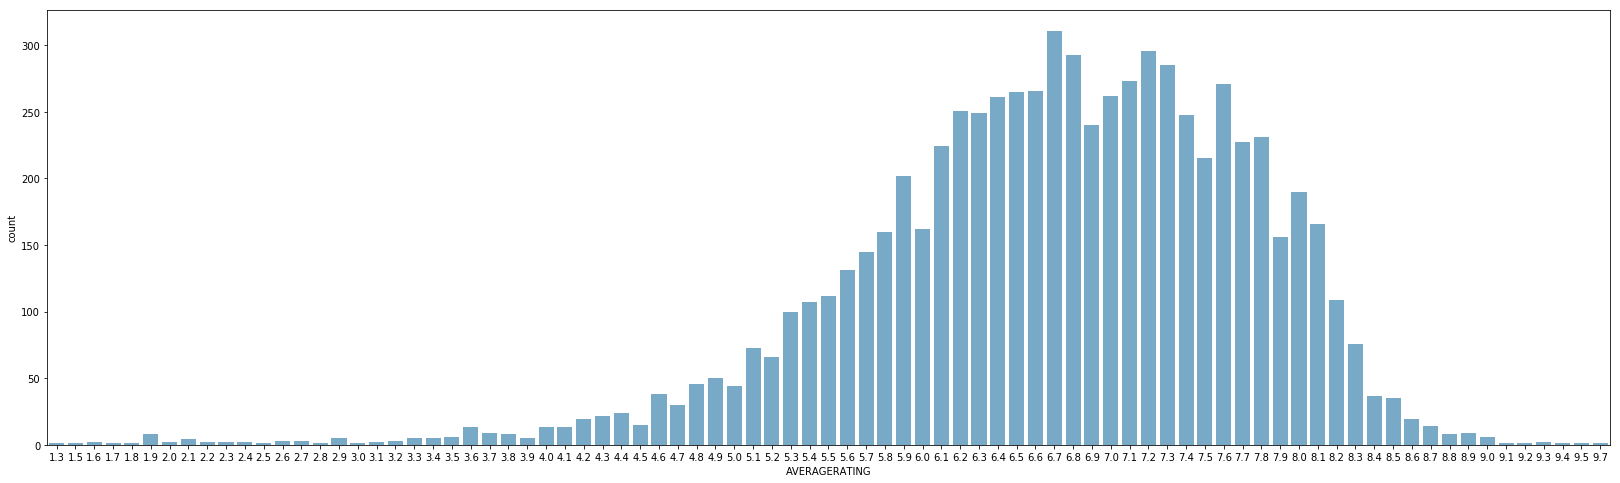

In [11]:
plt.figure(figsize=(28, 8))
sns.countplot(x="AVERAGERATING", data=df, palette=sns_palette)

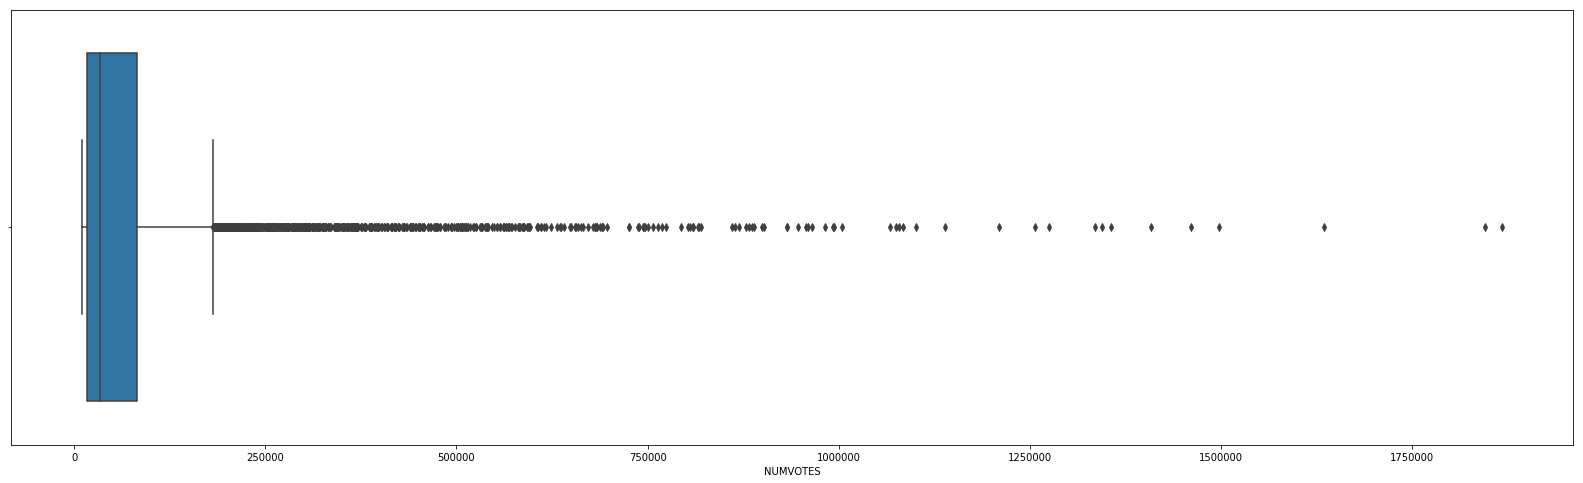

In [12]:
plt.figure(figsize=(28, 8))
sns.boxplot(df["NUMVOTES"])

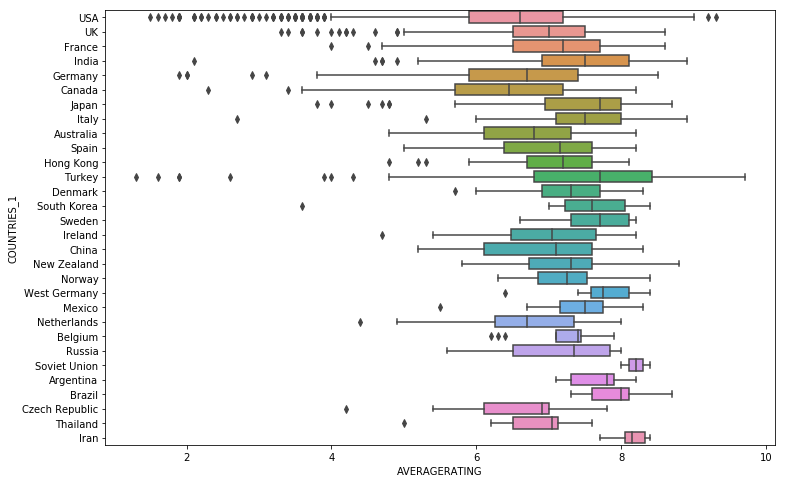

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="AVERAGERATING", y="COUNTRIES_1", data=df[df["COUNTRIES_1"].isin(df["COUNTRIES_1"].value_counts()[:30].index)], order=df["COUNTRIES_1"].value_counts().index[:30])

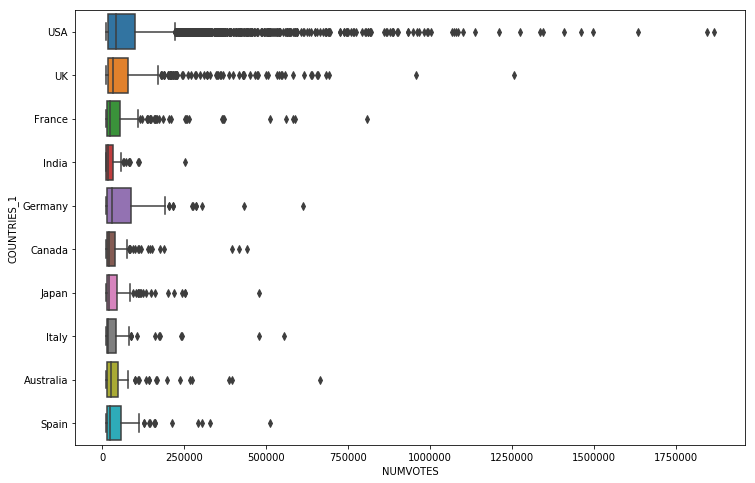

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="NUMVOTES", y="COUNTRIES_1", data=df[df["COUNTRIES_1"].isin(df["COUNTRIES_1"].value_counts()[:10].index)], order=df["COUNTRIES_1"].value_counts().index[:10])

TypeError: Can't convert 'float' object to str implicitly

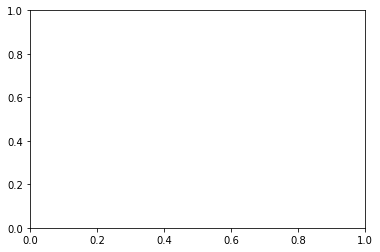

In [155]:
sns.distplot(df["DETAILS_BUDGET"], kde=False)

In [156]:
print(random.sample(df["DETAILS_BUDGET"].tolist(), 100))

['$3,300,000', '$5,000,000', '$16,000,000', '$20,000,000', '$7,000,000', '$18,000,000', '$50,000,000', nan, '$130,000,000', '$25,150,000', '$55,000,000', '£4,000,000', nan, '£8,000,000', nan, '$28,000,000', nan, '$10,000,000', '$650,000', nan, nan, '$27,000,000', nan, '$15,000,000', '$80,000,000', '$8,000,000', '$5,000,000', '$15,000,000', nan, '$50,000,000', '$1,800,000', nan, '$10,000,000', '$15,000,000', '$26,000,000', '$40,000,000', '$12,000,000', '$35,000,000', '$10,000,000', nan, '$12,000,000', '$25,000,000', '$3,000,000', nan, '$7,000', '$120,000,000', nan, '£14,000', nan, '$3,000,000', '$11,000,000', '$28,000,000', '£170,000', '$15,000,000', '$8,000,000', '$22,000,000', '$15,000,000', '$10,000,000', nan, 'DKK\xa015,500,000', '$10,000,000', nan, nan, '$4,000,000', '$55,000,000', '$30,000,000', '$20,000,000', '$10,000,000', '$25,000,000', '$28,000,000', nan, '$5,000,000', nan, '$20,000,000', nan, '$60,000,000', '$38,000,000', '$20,000,000', '$21,000,000', nan, nan, '$45,000,000',

## Suppression des colonnes qui ont peu de contenu

In [16]:
counter_dimensions = Counter([item.split("_")[0] for item in df.columns])

In [17]:
counter_dimensions

Counter({'': 3,
         'AVERAGERATING': 1,
         'AWARDS': 4,
         'COMPOSER': 4,
         'COUNTRIES': 16,
         'CRITICS': 2,
         'DETAILS': 4,
         'DIRECTOR': 2,
         'IS': 28,
         'LANG': 19,
         'NUMVOTES': 1,
         'OFFICIAL': 2,
         'PRODUCTORS': 3,
         'RUNTIMEMINUTES': 1,
         'STAR': 3,
         'WRITER': 2})

In [18]:
df[pd.notnull(df["COUNTRIES_3"])].shape

(840, 95)

In [19]:
df[pd.notnull(df["LANG_3"])].shape

(1109, 95)

In [20]:
lang_col_to_delete = ["LANG_%d" %i for i in range(4, counter_dimensions["LANG"] + 1)]
countries_col_to_delete = ["COUNTRIES_%d" %i for i in range(4, counter_dimensions["COUNTRIES"] + 1)]

In [21]:
df = df.drop(lang_col_to_delete + countries_col_to_delete, axis=1)

In [22]:
df[pd.notnull(df["DIRECTOR_2"])].shape

(495, 66)

In [23]:
del df["DIRECTOR_2"]

In [24]:
df[pd.notnull(df["COMPOSER_2"])].shape

(175, 65)

In [25]:
del df["COMPOSER_2"]
del df["COMPOSER_3"]
del df["COMPOSER_4"]

# Préparation des données 

## Normalisation du budget et du box office

In [26]:
print(random.sample(df["DETAILS_BUDGET"].tolist(), 100))

['$11,000,000', '$33,000,000', '$65,000,000', '$8,300,000', '$14,500,000', '$15,000,000', nan, nan, '$40,000,000', '$19,000,000', '$1,000,000', '$90,000,000', nan, '$8,500,000', '$100,000', '$325,000', '$1,000,000', 'DKK\xa035,500,000', '$18,000,000', '$10,000,000', '£4,000,000', '$6,000,000', '$20,000,000', '$11,000,000', '$7,000,000', '$40,000,000', '$13,000,000', nan, nan, '$80,000,000', '$20,000,000', '$10,000,000', nan, '$11,500,000', '$20,000,000', '$25,000,000', '$22,400,000', '$40,000,000', nan, '$19,000,000', '$30,000,000', nan, '$20,000,000', '$20,000,000', nan, '$2,000,000', '$2,800,000', '$47,000,000', nan, '$36,000,000', '$2,100,000', '$10,500,000', '$12,000,000', '$58,000,000', 'AUD\xa030,000,000', nan, nan, '$68,000,000', '$7,000,000', '$145,000,000', '$55,000,000', '$75,000,000', '$2,900,000', '$87,000,000', '$19,000,000', '$50,000,000', '$6,000,000', '$90,000,000', '$5,000,000', '$15,000,000', '£20,000,000', '$35,000,000', nan, '$4,700,000', '$22,000,000', nan, '$10,00

In [27]:
print(random.sample(df["DETAILS_GROSS"].tolist(), 100))

['$24,946,533', '$627,047', '$33,518', '$14,000,000', nan, '$206,459,076', '$49,369,899', '$26,024,456', '$23,979,741', '$83,504,017', '$32,153,522', '$175,493', nan, nan, '$348,149', '$127,509,326', '$56,569,216', nan, '$27,441,977', '$210,614,939', '$5,479,037', '$59,031,057', nan, '$5,793', '$16,252,765', '$3,827,060', '$152,857', nan, '$13,023', '$32,662,299', '$2,541,554', '$5,370,000', '$26,483,452', '$39,567', nan, '$4,532,791', '$38,072,438', '$28,082,366', '$45,489,752', '$1,358,561', '$20,966,644', '$36,734,619', '$7,757,130', '$15,279,680', '$84,052,762', '$114,197,520', '$16,371,128', '$9,837', nan, '$82,622,655', '$8,264,530', '$239,294', '$4,298,329', '$281,492,479', '$92,115,211', '$55,691,208', '$449,191', '$25,132,228', '$3,121', '$25,481,529', '$17,324,744', '$48,143,579', '$75,530,832', nan, '$75,505,856', '$128,814,019', '$40,219,708', '$219,200,000', '$2,783,970', '$1,700,000', '$4,919,896', '$553,171', '$85,288,303', nan, '$206,362,140', '$38,252,284', '$33,422,55

In [28]:
EUR_TO_USD = 1.17
GBP_TO_USD = 1.30
def extract_currency(amount):
    if pd.isnull(amount):
        return
    elif amount.startswith("$"):
        return int(amount[1:].replace(",", ""))
    elif amount.startswith("€"):
        return int(amount[1:].replace(",", "")) * EUR_TO_USD
    elif amount.startswith("£"):
        return int(amount[1:].replace(",", "")) * GBP_TO_USD

In [29]:
df["BUDGET_IN_USD"] = df["DETAILS_BUDGET"].apply(lambda x: extract_currency(x))
df["BOXOFFICE_US"] = df["DETAILS_GROSS"].apply(lambda x: extract_currency(x))

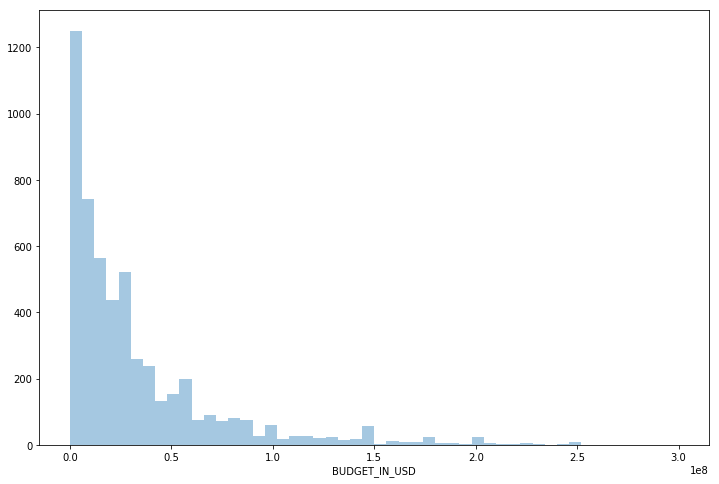

In [30]:
plt.figure(figsize=(12, 8))
sns.distplot(df[pd.notnull(df["BUDGET_IN_USD"])]["BUDGET_IN_USD"], kde=False)

## Normalisation critics 

In [31]:
print(random.sample(df["CRITICS_USER"].tolist(), 100))

['593', '263', '125', '850', '112', '128', '160', '504', '773', '416', '157', '313', '85', '526', '103', '208', '455', '103', '127', '47', '107', '149', '84', '50', '715', '62', '761', '142', '314', '64', '322', '268', '73', '326', '76', '358', '101', '219', '90', '121', '387', '96', '364', '291', '109', '648', '38', '95', '46', '105', '146', '46', '847', '189', '176', '335', '93', '248', '300', '65', '287', '90', '319', '220', '205', '660', '259', '157', '40', '210', '402', '693', '49', '70', '88', '1,088', '56', '63', '71', '250', '72', '55', '115', '103', '360', '48', '373', '93', '1,434', '406', '771', '149', '40', '83', '133', '133', '424', '247', '939', '509']


In [32]:
def normalize_critics(row):
    if pd.notnull(row["CRITICS_CRITIC"]):
        row["CRITICS_CRITIC"] = int(row["CRITICS_CRITIC"].replace(",", ""))
    if pd.notnull(row["CRITICS_USER"]):
        row["CRITICS_USER"] = int(row["CRITICS_USER"].replace(",", ""))
    return row

In [33]:
df = df.apply(lambda row: normalize_critics(row), axis=1)

## Normalisation donnée de communication 

In [34]:
df["OFFICIAL_SITES_1"].value_counts()

Facebook                                                    1416
site                                                         931
site [Japan]                                                 229
site [France]                                                 93
Site                                                          87
site [Germany]                                                49
site [United States]                                          45
site [Spain]                                                  35
site [UK]                                                     27
site [Russia]                                                 24
Facebook Page                                                 23
Blog                                                          21
site [Australia]                                              19
site [Brazil]                                                 15
Facebook [France]                                             12
MySpace                  

In [35]:
def normalize_site(row):
    row["COMMUNICATION_HAS_WEBSITE"] = 0
    row["COMMUNICATION_HAS_FACEBOOK"] = 0
    communication = str(row.get("OFFICIAL_SITES_1", "")) + " " + str(row.get("OFFICIAL_SITES_2", ""))
    communication = communication.lower().split(" ")
    if "site" in communication:
        row["COMMUNICATION_HAS_WEBSITE"] = 1
    if "facebook" in communication:
        row["COMMUNICATION_HAS_FACEBOOK"] = 1
    return row

In [36]:
df = df.apply(lambda row: normalize_site(row), axis=1)

In [157]:
df.head()

_METASCORE   WRITER_1                      PRODUCTORS_1  IS_SHORT  \
tt0004972         NaN  nm0228746           David W. Griffith Corp.       NaN   
tt0006864         NaN  nm0000428         Triangle Film Corporation       NaN   
tt0010323         NaN  nm0562346                  Decla-Bioscop AG       NaN   
tt0012349         NaN  nm0000122       Charles Chaplin Productions       NaN   
tt0013442         NaN  nm0831290  Jofa-Atelier Berlin-Johannisthal       NaN   

           IS_MYSTERY  IS_ADULT  CRITICS_USER  IS_MUSIC LANG_2  NUMVOTES  \
tt0004972         NaN       NaN         334.0       NaN    NaN     18549   
tt0006864         NaN       NaN          91.0       NaN    NaN     11646   
tt0010323         1.0       NaN         202.0       NaN    NaN     43970   
tt0012349         NaN       NaN         126.0       NaN    NaN     79354   
tt0013442         NaN       NaN         371.0       NaN    NaN     73759   

           IS_NEWS  RUNTIMEMINUTES  IS_FILM-NOIR DETAILS_BUDGET  IS_WAR  \
tt0004972      NaN           195.0           NaN       $100,000     1.0   
tt0006864      NaN           163.0           NaN       $385,907     NaN   
tt0010323      NaN            76.0           NaN        $18,000     NaN   
tt0012349      NaN            68.0           NaN       $250,000     NaN   
tt0013442      NaN            94.0           NaN            NaN     NaN   

           IS_SPORT  IS_SCI-FI  IS_COMEDY  IS_WESTERN  IS_ANIMATION  \
tt0004972       NaN        NaN        NaN         NaN           NaN   
tt0006864       NaN        NaN        NaN         NaN           NaN   
tt0010323       NaN        NaN        NaN         NaN           NaN   
tt0012349       NaN        NaN        1.0         NaN           NaN   
tt0013442       NaN        NaN        NaN         NaN           NaN   

              STAR_1  IS_HORROR DIRECTOR_1  IS_THRILLER  \
tt0004972  nm0550615        NaN  nm0000428          NaN   
tt0006864  nm0550615        NaN  nm0000428          NaN   
tt0010323  nm0891998        1.0  nm0927468          NaN   
tt0012349  nm0701012        NaN  nm0000122          NaN   
tt0013442  nm0485146        1.0  nm0003638          NaN   

                                                  _STORYLINE     STAR_3  \
tt0004972  \nTwo brothers, Phil and Ted Stoneman, visit t...  nm0001273   
tt0006864  \nIntolerance and its terrible effects are exa...  nm0001196   
tt0010323  \nFrancis, a young man, recalls in his memory ...  nm0470328   
tt0012349  \nThe opening title reads: "A comedy with a sm...  nm0000122   
tt0013442  \nWisbourg, Germany based estate agent Knock d...  nm0775180   

          DETAILS_GROSS  IS_FAMILY COMPOSER_1  IS_BIOGRAPHY PRODUCTORS_3  \
tt0004972   $10,000,000        NaN        NaN           NaN          NaN   
tt0006864           NaN        NaN        NaN           NaN          NaN   
tt0010323           NaN        NaN  nm0005959           NaN          NaN   
tt0012349    $5,450,000        1.0        NaN           NaN          NaN   
tt0013442           NaN        NaN  nm0002302           NaN          NaN   

           IS_ACTION  IS_FANTASY  IS_TALK-SHOW        DETAILS_RELEASE_DATE  \
tt0004972        NaN         NaN           NaN         21 March 1915 (USA)   
tt0006864        NaN         NaN           NaN        12 May 1919 (France)   
tt0010323        NaN         1.0           NaN  27 February 1920 (Germany)   
tt0012349        NaN         NaN           NaN   9 November 1923 (Germany)   
tt0013442        NaN         1.0           NaN           3 June 1929 (USA)   

           IS_ADVENTURE  IS_DRAMA  CRITICS_CRITIC COUNTRIES_1     STAR_2  \
tt0004972           NaN       1.0            84.0         USA  nm0910400   
tt0006864           NaN       1.0            72.0         USA  nm0001273   
tt0010323           NaN       NaN           151.0     Germany  nm0270415   
tt0012349           NaN       1.0            89.0         USA  nm0001067   
tt0013442           NaN       NaN           244.0     Germany  nm0775659   

      

# Prédiction de la rentabilité

In [37]:
def is_profitable(row):
    if row["BOXOFFICE_US"] - row["BUDGET_IN_USD"] >= 0:
        return 1
    return 0

In [38]:
df_study = df[(pd.notnull(df["BOXOFFICE_US"])) & (pd.notnull(df["BUDGET_IN_USD"]))]

In [39]:
df_study.shape

(4749, 66)

In [40]:
df_study["class"] = df_study.apply(lambda row: is_profitable(row), axis=1)

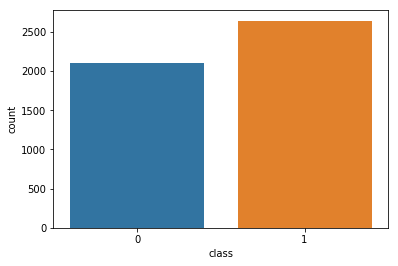

In [41]:
sns.countplot(df_study["class"])

In [42]:
for col in df_study.columns:
    if df_study[pd.notnull(df_study[col])].shape[0] == 0:
        print(col)

IS_SHORT
IS_ADULT
IS_NEWS
IS_TALK-SHOW
IS_GAME-SHOW
IS_REALITY-TV


In [43]:
for col in df_study.columns:
    if df_study[pd.notnull(df_study[col])].shape[0] == 0:
        del df_study[col]

## Intuition

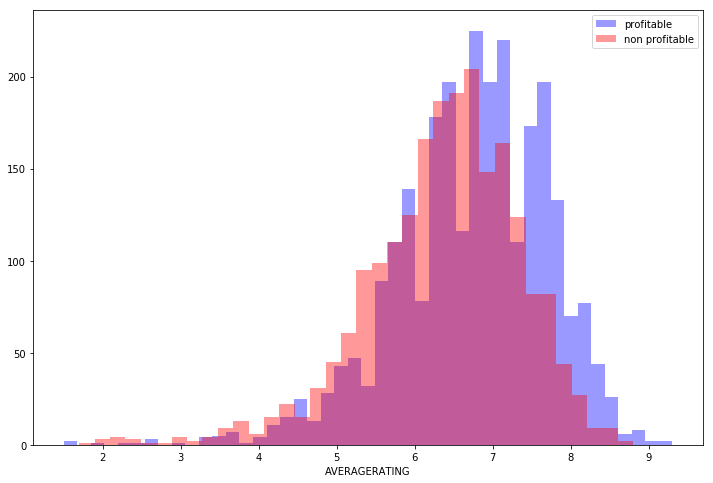

In [44]:
first_experiment = "AVERAGERATING"
plt.figure(figsize=(12, 8))
sns.distplot(a=df_study[df_study["class"] == 1][first_experiment], kde=False, color="blue", label="profitable")
sns.distplot(a=df_study[df_study["class"] == 0][first_experiment], kde=False, color="red", label="non profitable")
plt.legend()

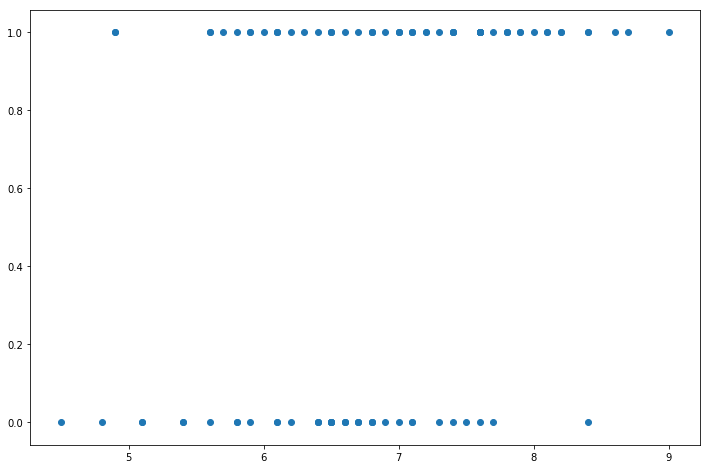

In [45]:
plt.figure(figsize=(12, 8))
df_study_sample = df_study.sample(100)
plt.scatter(df_study_sample[first_experiment], df_study_sample["class"])

In [46]:
LinearR = LinearRegression()
LinearR = LinearR.fit(df_study_sample[[first_experiment]], np.array(df_study_sample["class"]))
y_preds = LinearR.predict(df_study_sample[[first_experiment]])

In [47]:
LinearR.coef_[0], LinearR.intercept_

(0.17665725724617629, -0.60621575247689174)

In [48]:
x_0 = - LinearR.intercept_ / LinearR.coef_[0]

In [49]:
x_0

3.4315926892950399

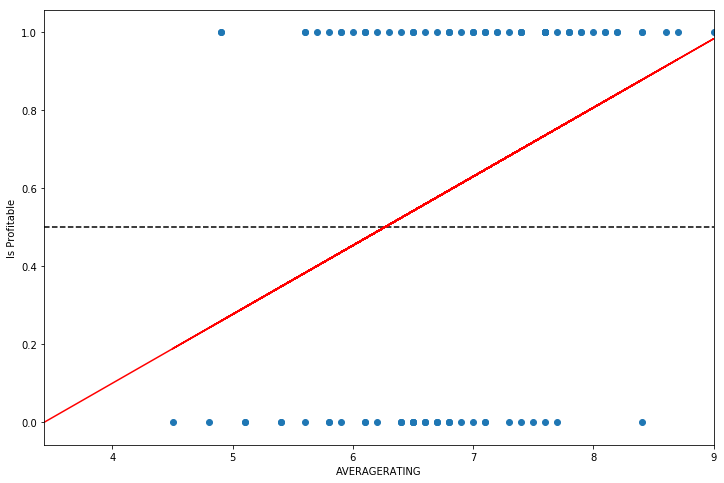

In [50]:
plt.figure(figsize=(12, 8))
plt.scatter(df_study_sample[first_experiment], df_study_sample["class"])
x = [x_0] + df_study_sample[first_experiment].tolist()
y_preds = [0] +  list(y_preds)
plt.plot(x, y_preds, color='red')
plt.xlabel(first_experiment)
plt.ylabel('Is Profitable')
plt.xlim(x_0, max(df_study_sample[first_experiment]))
plt.hlines(0.5, x_0, max(df_study_sample[first_experiment]), linestyles="dashed")

In [51]:
x_thr = (0.5 - LinearR.intercept_) / LinearR.coef_[0]

In [52]:
x_thr

6.261932114882506

si la note du film est supérieure à x_thr --> le film est rentable, sinon il ne l'est pas 

In [53]:
df_study["pred"] = df_study[first_experiment].apply(lambda x: 1 if x >= x_thr else 0)

In [54]:
print(classification_report(df_study["class"], df_study["pred"]))

             precision    recall  f1-score   support

          0       0.53      0.40      0.45      2108
          1       0.60      0.72      0.65      2641

avg / total       0.57      0.57      0.56      4749



## Régression Logistique

In [55]:
def evaluate_model(cls, X, y):
    preds = cross_val_predict(cls, X, y)
    print(classification_report(y, preds))
    
    cls = cls.fit(X, y)
    return cls, preds

In [56]:
LR = LogisticRegression()

In [57]:
Y = np.array(df_study["class"])

In [58]:
movie_ids = list(df_study.index)

In [59]:
first_model, preds = evaluate_model(LogisticRegression(), df_study[[first_experiment]].as_matrix(), Y)

             precision    recall  f1-score   support

          0       0.53      0.27      0.35      2108
          1       0.58      0.81      0.68      2641

avg / total       0.56      0.57      0.53      4749



## Ajout d'une 2ème variable

In [60]:
df_profitable = df_study[df_study["class"] == 1]
df_non_profitable = df_study[df_study["class"] == 0]

In [61]:
other_col = "NUMVOTES"

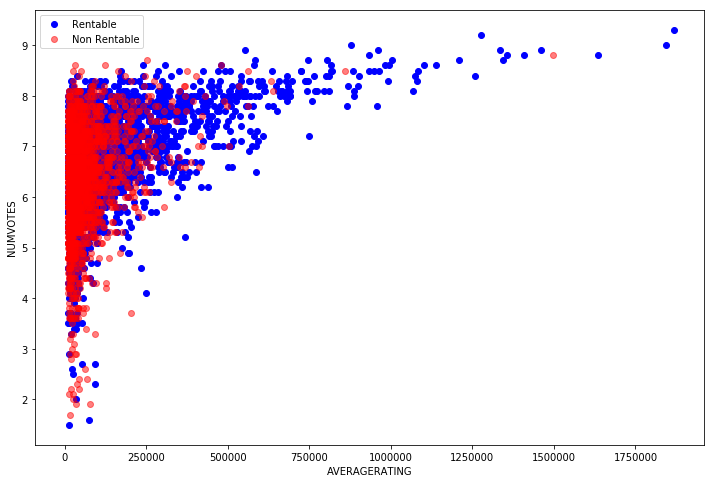

In [62]:
plt.figure(figsize=(12, 8))
plt.scatter(df_profitable[other_col], df_profitable[first_experiment], color="b", label="Rentable")
plt.scatter(df_non_profitable[other_col], df_non_profitable[first_experiment], color="r", label="Non Rentable", alpha=0.5)
plt.xlabel(first_experiment)
plt.ylabel(other_col)
plt.legend()

In [63]:
train_cols_v2 = [first_experiment, other_col]
second_model, preds = evaluate_model(LogisticRegression(), df_study[train_cols_v2].as_matrix(), Y)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      2108
          1       0.56      1.00      0.71      2641

avg / total       0.31      0.56      0.40      4749



In [64]:
def plot_feature_coefs(coefs, feature_names, skip_first=0):
    plt.figure(figsize=(12, 8))
    order_ = np.flipud(np.argsort(coefs))
    imp = sorted(coefs, reverse=True)[skip_first:]
    tick_labels = np.array(feature_names)[order_][skip_first:]
    plt.barh(range(len(coefs) - skip_first), imp, tick_label=tick_labels, alpha=0.7)

In [65]:
dict(zip(train_cols_v2, second_model.coef_.ravel()))

{'AVERAGERATING': -7.2941207917759876e-11, 'NUMVOTES': 4.1741372518161841e-06}

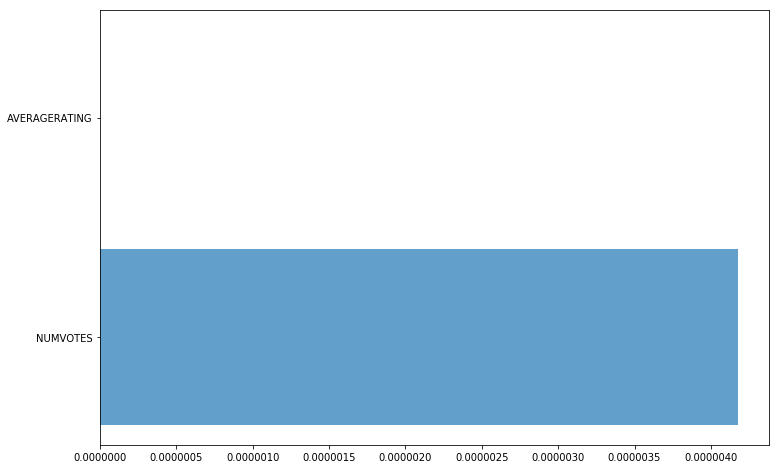

In [66]:
plot_feature_coefs(second_model.coef_.ravel(), train_cols_v2)

## Aujout d'autres variables

In [67]:
train_cols_v3 = [first_experiment, other_col, 'RUNTIMEMINUTES']

In [68]:
third_model, preds = evaluate_model(LogisticRegression(), df_study[train_cols_v3].fillna(0).as_matrix(), Y)

             precision    recall  f1-score   support

          0       0.55      0.62      0.59      2108
          1       0.67      0.60      0.63      2641

avg / total       0.62      0.61      0.61      4749



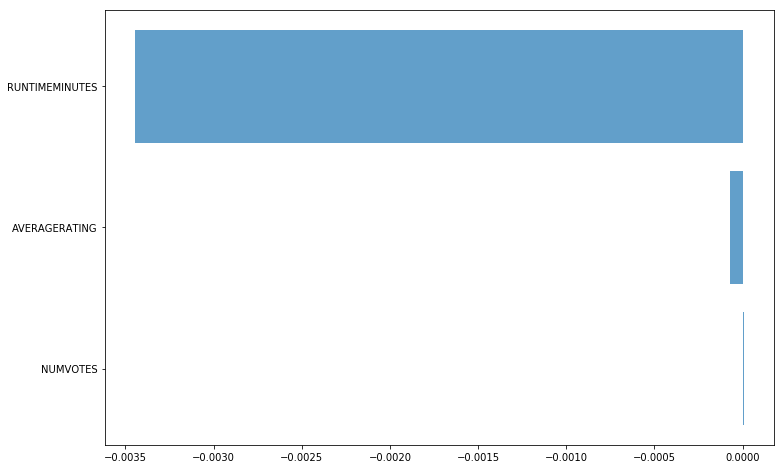

In [69]:
plot_feature_coefs(third_model.coef_.ravel(), train_cols_v3, skip_first=0)

In [70]:
dict(zip(train_cols_v3, list(third_model.coef_.ravel())))

{'AVERAGERATING': -6.9997156086033856e-05,
 'NUMVOTES': 6.4498124681354842e-06,
 'RUNTIMEMINUTES': -0.003445641954391631}

## Identification des mauvaises prédictions

In [71]:
def get_probas(cls, X):
    probas = cls.predict_proba(X)[:, 1]
    return probas

In [72]:
def get_misclassified_df(df, model, cols):
    df["proba_class_1"] = get_probas(model, df_study[cols].fillna(0).as_matrix())
    df["pred"] = df["proba_class_1"].apply(lambda x: 1 if x >= 0.5 else 0)
    df_fp = df[(df["pred"] == 1) & (df["class"] == 0)]
    df_fn = df[(df["pred"] == 0) & (df["class"] == 1)]
    return df_fp, df_fn

In [73]:
df_fp, df_fn = get_misclassified_df(df_study, third_model, train_cols_v3)

In [74]:
df_fp.shape

(725, 63)

In [75]:
df_fn.shape

(1088, 63)

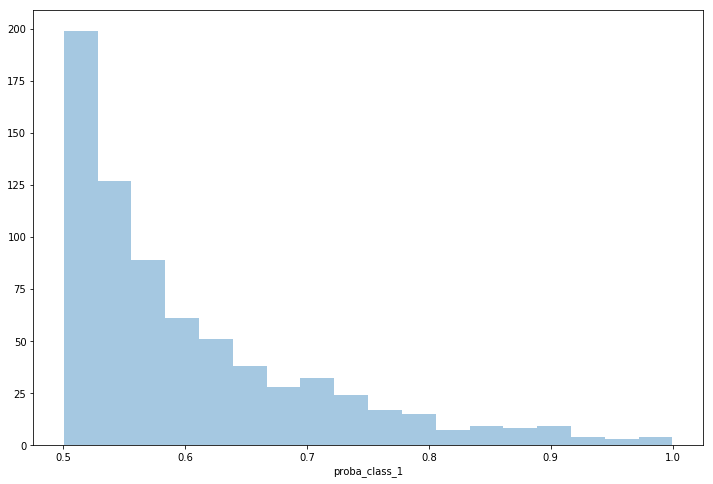

In [76]:
plt.figure(figsize=(12, 8))
sns.distplot(df_fp["proba_class_1"], kde=False)

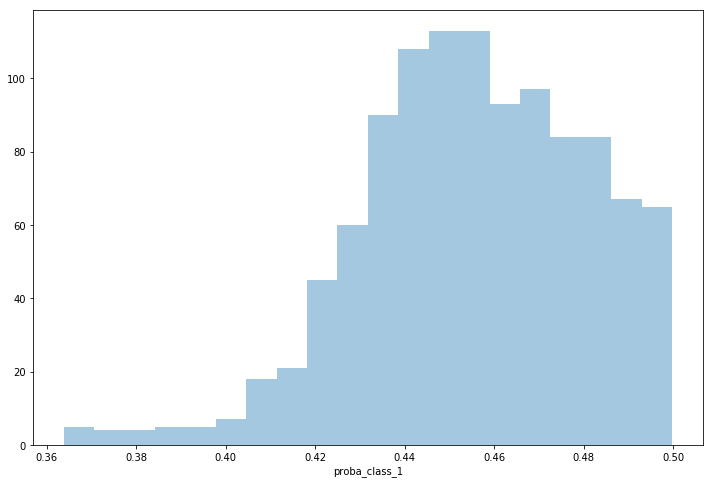

In [77]:
plt.figure(figsize=(12, 8))
sns.distplot(df_fn["proba_class_1"], kde=False)

In [78]:
def compare_distplot(study_column):
    plt.figure(figsize=(12, 8))
    sns.distplot(df_fp[study_column].fillna(0), color="red", kde=False, label="Faux positifs")
    sns.distplot(df_fn[study_column].fillna(0), color="blue", kde=False, label="Faux négatifs")
    plt.legend()

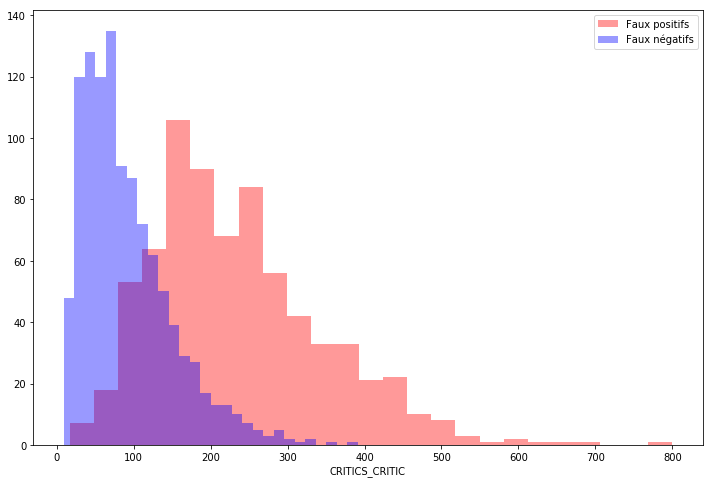

In [79]:
compare_distplot("CRITICS_CRITIC")

In [80]:
def evaluate_and_plot(df, cols, Y):
    new_model, new_preds = evaluate_model(LogisticRegression(), df[cols].fillna(0).as_matrix(), Y)
    plot_feature_coefs(new_model.coef_.ravel(), cols, skip_first=0)
    return new_model, new_preds

In [81]:
train_cols_v4 = train_cols_v3 + ["CRITICS_CRITIC"]

             precision    recall  f1-score   support

          0       0.55      0.73      0.63      2108
          1       0.71      0.53      0.60      2641

avg / total       0.64      0.62      0.61      4749



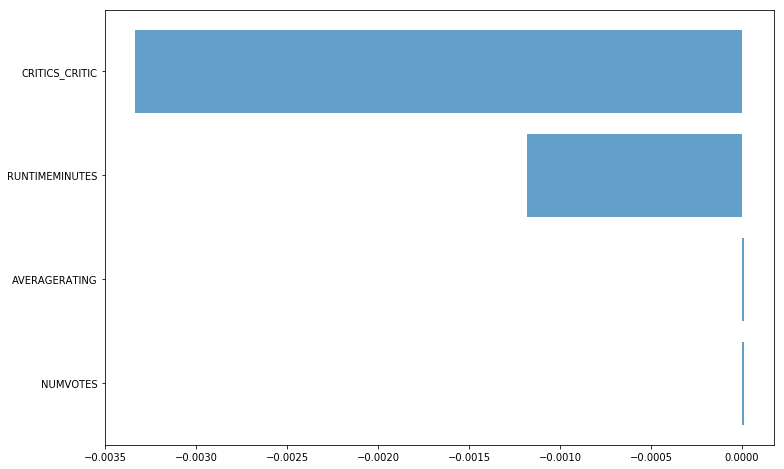

In [82]:
fourth_model, preds = evaluate_and_plot(df_study, train_cols_v4, Y)

In [83]:
df_fp, df_fn = get_misclassified_df(df_study, fourth_model, train_cols_v4)

In [84]:
df_fn.sample(100)

_METASCORE   WRITER_1                           PRODUCTORS_1  \
tt0452681        32.0  nm0833828                   Walt Disney Pictures   
tt0076070         NaN  nm0795461                           Warner Bros.   
tt1371150        44.0  nm2267086                  21 Laps Entertainment   
tt0062376         NaN  nm0104075          Columbia Pictures Corporation   
tt0090655         NaN  nm0045301                     Paramount Pictures   
tt0408524        65.0  nm0275629                     Paramount Pictures   
tt0421206        52.0  nm0536587           Columbia Pictures Industries   
tt0301470        36.0  nm0759207                         United Artists   
tt1985966        59.0  nm1106214                      Columbia Pictures   
tt2377322        40.0  nm0220600                            Screen Gems   
tt0090103        76.0  nm0089237                       Embassy Pictures   
tt1711425        34.0  nm0601859                       Relativity Media   
tt1311067        35.0  nm0957772                        Dimension Films   
tt2980648        55.0  nm1140275                   Amblin Entertainment   
tt0098320         NaN  nm0000127                            Alive Films   
tt1691916        58.0  nm0535940                      Awesomeness Films   
tt0093640        77.0  nm0269879                         Orion Pictures   
tt0494652        46.0  nm0002700                     Universal Pictures   
tt0882977        51.0  nm1244808                  Exclusive Media Group   
tt0120877        42.0  nm0415979                            Film Office   
tt3231054        51.0  nm0721817                       LD Entertainment   
tt0088680        90.0  nm0591387                    Geffen Company, The   
tt0800069        32.0  nm0000127                             Fox Atomic   
tt0264761        72.0  nm0922724               Fox Searchlight Pictures   
tt0489237        46.0  nm2096064                  The Weinstein Company   
tt4853102         NaN  nm2082787                 Warner Bros. Animation   
tt1655442        89.0  nm0371890                              Studio 37   
tt0313911        41.0  nm1005420              Metro-Goldwyn-Mayer (MGM)   
tt1258972        51.0  nm0753526                        Arcade Pictures   
tt0373283        56.0  nm1418750                               Go Films   
...               ...        ...                                    ...   
tt0079240        68.0  nm0000341                         Starling Films   
tt0240462        49.0  nm0517452                  Twentieth Century Fox   
tt3316960        72.0  nm0922903                           Lutzus-Brown   
tt2103254        39.0  nm1229520               Gary Sanchez Productions   
tt0054135         NaN  nm0496468                 Dorchester Productions   
tt0120777        70.0  nm0740400                   Rysher Entertainment   
tt0107478         NaN  nm0771486                                 Canal+   
tt0092699        84.0  nm0000985                         Amercent Films   
tt4877122        12.0  nm1902232                      Columbia Pictures   
tt3210686        37.0  nm0817895       Hearst Entertainment Productions   
tt0112572         NaN  nm0253214                     Paramount Pictures   
tt2042568        93.0  nm0001053                              CBS Films   
tt0374102        63.0  nm0448900                    Plunge Pictures LLC   
tt1114677        47.0  nm0073504               It's a Laugh Productions   
tt0054847         NaN  nm0948634            Samuel Bronston Productions   
tt2057392        73.0  nm0382505                          Raindog Films   
tt0048960         NaN  nm0268513                   Michael Todd Company   
tt0077269        40.0  nm0332392                          Sir Lew Grade   
tt1767382        49.0  nm0490582                            Elle Driver   
tt2277860        77.0  nm0004056                Pixar Animation Studios   
tt0433362        57.0  nm1294962                              Lionsgate   
tt0110308        85.0  nm0052964  In

In [85]:
df_fp.sample(100)

_METASCORE   WRITER_1                       PRODUCTORS_1  \
tt0163978        43.0  nm0388076                      Figment Films   
tt1464540        36.0  nm0587692                         DreamWorks   
tt1790886        50.0  nm0376260                       Warner Bros.   
tt0113749        41.0  nm0003620              Gramercy Pictures (I)   
tt2788710        52.0  nm0736622                  Columbia Pictures   
tt0111301         NaN  nm0211823               Capcom Entertainment   
tt1213644        15.0  nm0294997                          Lionsgate   
tt0120179        23.0  nm0003662             Blue Tulip Productions   
tt1959490        68.0  nm0359504                 Paramount Pictures   
tt0338751        77.0  nm0517589                       Forward Pass   
tt1267297        47.0  nm2952284                 Paramount Pictures   
tt0182789        42.0  nm0001920                      1492 Pictures   
tt0338526        35.0  nm0814085                 Universal Pictures   
tt0274166        51.0  nm0905498                 Universal Pictures   
tt0089881        96.0  nm0644823         Greenwich Film Productions   
tt0142688        44.0  nm0702416              Artisan Entertainment   
tt1628841        32.0  nm1288961              Twentieth Century Fox   
tt1815862        33.0  nm1729428                  Columbia Pictures   
tt0218922        33.0  nm0188165          Metro-Goldwyn-Mayer (MGM)   
tt0325703        43.0  nm1212988                 Paramount Pictures   
tt0242653        47.0  nm0905152                       Warner Bros.   
tt1194173        61.0  nm0319659                 Universal Pictures   
tt0406375        67.0  nm0885575      Columbia Pictures Corporation   
tt0042192         NaN  nm0000581              Twentieth Century Fox   
tt0088258        85.0  nm0001302                   Spinal Tap Prod.   
tt0114214        49.0  nm0601881                   TriStar Pictures   
tt0243585        66.0  nm0926824      Columbia Pictures Corporation   
tt0758774        57.0  nm2015758                       Warner Bros.   
tt0265087        32.0  nm0702912              Twentieth Century Fox   
tt0133240        60.0  nm0166256      Walt Disney Feature Animation   
...               ...        ...                                ...   
tt0137523        66.0  nm0657333                  Fox 2000 Pictures   
tt1606378        28.0  nm0861636              Twentieth Century Fox   
tt0955308        53.0  nm0001338                 Universal Pictures   
tt0405296        73.0  nm0001140  Warner Independent Pictures (WIP)   
tt0364569        74.0  nm1628380                          Egg Films   
tt1386703        43.0  nm0093560                       Total Recall   
tt1210819        37.0  nm1244808               Walt Disney Pictures   
tt1446714        65.0  nm3123612              Twentieth Century Fox   
tt0070379         NaN  nm0000217                       Warner Bros.   
tt0865556        57.0  nm0299301           Casey Silver Productions   
tt0108238         NaN  nm0380705      Columbia Pictures Corporation   
tt1211956        49.0  nm0445669               Summit Entertainment   
tt0092965        62.0  nm0001779               Amblin Entertainment   
tt0168629        61.0  nm0001885            Zentropa Entertainments   
tt0317648        54.0  nm0299301                Touchstone Pictures   
tt0404030        58.0  nm1583636  Warner Independent Pictures (WIP)   
tt0443649        34.0  nm0460057                       Warner Bros.   
tt1013743        46.0  nm0642277              Twentieth Century Fox   
tt0113845         NaN  nm0724514                  Columbia Pictures   
tt0107302        49.0  nm0506629      PolyGram Filmed Entertainment   
tt1045778        34.0  nm1969144                  Columbia Pictures   
tt0448134        64.0  nm0307497                          DNA Films   
tt0423977        54.0  nm1122978          Metro-Goldwyn-Mayer (MGM)   
tt0091203        24.0  nm0927074     Thorn EMI Screen Entertainment   
tt1458175        52.0  nm0353673   

## Calcul de nouvelles variables

### Extraction mois de sortie

In [86]:
months_list = ["january","february","march","april","may","june","july","august","september","october","november","december"]
month_to_idx = {}
for idx, month in enumerate(months_list):
    month_to_idx[month] = idx + 1

In [87]:
month_regex = re.compile("|".join(months_list))

In [88]:
month_regex.findall("21 October 2017 (Turkey)".lower())[0]

'october'

In [89]:
greedy_season_to_month = {
    "Winter": [1, 2, 3],
    "Spring": [4, 5, 6],
    "Summer": [7, 8, 9],
    "Automn": [10, 11, 12]
}
season_to_idx = {"Winter": 1, "Spring": 2, "Summer": 3, "Automn": 4}

In [90]:
def extract_from_release_date(row):
    if pd.notnull(row["DETAILS_RELEASE_DATE"]):
        month = month_regex.findall(row["DETAILS_RELEASE_DATE"].lower())
        if month:
            month_idx = month_to_idx[month[0]]
            row["RELEASE_DATE_MONTH"] = month_idx
            for season, months in greedy_season_to_month.items():
                if month_idx in months:
                    row["RELEASE_SEASON"] = season_to_idx[season]
                    break
    return row

In [91]:
df_study = df_study.apply(lambda row: extract_from_release_date(row), axis=1)

In [92]:
df_study.head()

AVERAGERATING  AWARDS_NB_OSCAR_NOMINATIONS  AWARDS_NB_OSCAR_WON  \
tt0004972            6.7                          NaN                  NaN   
tt0012349            8.3                          NaN                  NaN   
tt0015864            8.2                          2.0                  NaN   
tt0020629            8.1                          NaN                  2.0   
tt0021749            8.6                          NaN                  NaN   

           AWARDS_NB_OTHER_NOMINATIONS  AWARDS_NB_OTHER_WINS  BOXOFFICE_US  \
tt0004972                          NaN                   2.0    10000000.0   
tt0012349                          NaN                   1.0     5450000.0   
tt0015864                          1.0                   3.0     5450000.0   
tt0020629                          2.0                   5.0     3270000.0   
tt0021749                          NaN                   3.0       19181.0   

           BUDGET_IN_USD  COMMUNICATION_HAS_FACEBOOK  \
tt0004972       100000.0                           0   
tt0012349       250000.0                           0   
tt0015864       923000.0                           0   
tt0020629      1448864.0                           0   
tt0021749      1500000.0                           0   

           COMMUNICATION_HAS_WEBSITE COMPOSER_1 COUNTRIES_1 COUNTRIES_2  \
tt0004972                          0        NaN         USA         NaN   
tt0012349                          0        NaN         USA         NaN   
tt0015864                          0  nm0675356         USA         NaN   
tt0020629                          0        NaN         USA         NaN   
tt0021749                          0        NaN         USA         NaN   

          COUNTRIES_3  CRITICS_CRITIC  CRITICS_USER DETAILS_BUDGET  \
tt0004972         NaN            84.0         334.0       $100,000   
tt0012349         NaN            89.0         126.0       $250,000   
tt0015864         NaN           108.0         161.0       $923,000   
tt0020629         NaN            98.0         208.0     $1,448,864   
tt0021749         NaN           142.0         233.0     $1,500,000   

          DETAILS_GROSS       DETAILS_RELEASE_DATE  DETAILS_WORLDWIDE_GROSS  \
tt0004972   $10,000,000        21 March 1915 (USA)               11000000.0   
tt0012349    $5,450,000  9 November 1923 (Germany)                      NaN   
tt0015864    $5,450,000             1925 (Germany)                      NaN   
tt0020629    $3,270,000  4 December 1930 (Germany)                      NaN   
tt0021749       $19,181         7 March 1931 (USA)                      NaN   

          DIRECTOR_1  IS_ACTION  IS_ADVENTURE  IS_ANIMATION  IS_BIOGRAPHY  \
tt0004972  nm0000428        NaN           NaN           NaN           NaN   
tt0012349  nm0000122        NaN           NaN           NaN           NaN   
tt0015864  nm0000122        NaN           1.0           NaN           NaN   
tt0020629  nm0587277        NaN           NaN           NaN           NaN   
tt0021749  nm0000122        NaN           NaN           NaN           NaN   

           IS_COMEDY  IS_CRIME  IS_DOCUMENTARY  IS_DRAMA  IS_FAMILY  \
tt0004972        NaN       NaN             NaN       1.0        NaN   
tt0012349        1.0       NaN             NaN       1.0        1.0   
tt0015864        1.0       NaN             NaN       1.0        NaN   
tt0020629        NaN       NaN             NaN       1.0        NaN   
tt0021749        1.0       NaN             NaN       1.0        NaN   

           IS_FANTASY  IS_FILM-NOIR  IS_HISTORY  IS_HORROR  IS_MUSIC  \
tt0004972         NaN           NaN         1.0        NaN       NaN   
tt0012349         NaN           NaN         NaN        NaN       NaN   
tt0015864         NaN           NaN         NaN        NaN       NaN   
tt0020629         NaN           NaN         NaN        NaN       NaN   
tt0021749         NaN           NaN         NaN        NaN       NaN   

           IS_MUSICAL  IS_MYSTERY  IS_ROMANCE  IS_SCI-FI  IS_SPORT

In [93]:
df_fp, df_fn = get_misclassified_df(df_study, fourth_model, train_cols_v4)

In [94]:
df_fp.head()

AVERAGERATING  AWARDS_NB_OSCAR_NOMINATIONS  AWARDS_NB_OSCAR_WON  \
tt0021749            8.6                          NaN                  NaN   
tt0027977            8.5                          NaN                  NaN   
tt0035423            6.4                          1.0                  NaN   
tt0042192            8.3                          NaN                  6.0   
tt0043265            7.9                          NaN                  1.0   

           AWARDS_NB_OTHER_NOMINATIONS  AWARDS_NB_OTHER_WINS  BOXOFFICE_US  \
tt0021749                          NaN                   3.0       19181.0   
tt0027977                          1.0                   4.0      163245.0   
tt0035423                          4.0                   1.0    47121859.0   
tt0042192                         17.0                  17.0       10177.0   
tt0043265                          9.0                   2.0      536118.0   

           BUDGET_IN_USD  COMMUNICATION_HAS_FACEBOOK  \
tt0021749      1500000.0                           0   
tt0027977      1500000.0                           0   
tt0035423     48000000.0                           1   
tt0042192      1400000.0                           0   
tt0043265      1000000.0                           0   

           COMMUNICATION_HAS_WEBSITE COMPOSER_1 COUNTRIES_1 COUNTRIES_2  \
tt0021749                          0        NaN         USA         NaN   
tt0027977                          0        NaN         USA         NaN   
tt0035423                          0        NaN         USA         NaN   
tt0042192                          0        NaN         USA         NaN   
tt0043265                          0        NaN         USA          UK   

          COUNTRIES_3  CRITICS_CRITIC  CRITICS_USER DETAILS_BUDGET  \
tt0021749         NaN           142.0         233.0     $1,500,000   
tt0027977         NaN           126.0         230.0     $1,500,000   
tt0035423         NaN           123.0         325.0    $48,000,000   
tt0042192         NaN           122.0         332.0     $1,400,000   
tt0043265         NaN           116.0         223.0     $1,000,000   

          DETAILS_GROSS    DETAILS_RELEASE_DATE  DETAILS_WORLDWIDE_GROSS  \
tt0021749       $19,181      7 March 1931 (USA)                      NaN   
tt0027977      $163,245   11 February 1936 (UK)                      NaN   
tt0035423   $47,121,859  25 December 2001 (USA)               76019048.0   
tt0042192       $10,177   27 October 1950 (USA)                8400000.0   
tt0043265      $536,118     21 March 1952 (USA)               10750000.0   

          DIRECTOR_1  IS_ACTION  IS_ADVENTURE  IS_ANIMATION  IS_BIOGRAPHY  \
tt0021749  nm0000122        NaN           NaN           NaN           NaN   
tt0027977  nm0000122        NaN           NaN           NaN           NaN   
tt0035423  nm0003506        NaN           NaN           NaN           NaN   
tt0042192  nm0000581        NaN           NaN           NaN           NaN   
tt0043265  nm0001379        NaN           1.0           NaN           NaN   

           IS_COMEDY  IS_CRIME  IS_DOCUMENTARY  IS_DRAMA  IS_FAMILY  \
tt0021749        1.0       NaN             NaN       1.0        NaN   
tt0027977        1.0       NaN             NaN       1.0        1.0   
tt0035423        1.0       NaN             NaN       NaN        NaN   
tt0042192        NaN       NaN             NaN       1.0        NaN   
tt0043265        NaN       NaN             NaN       1.0        NaN   

           IS_FANTASY  IS_FILM-NOIR  IS_HISTORY  IS_HORROR  IS_MUSIC  \
tt0021749         NaN           NaN         NaN        NaN       NaN   
tt0027977         NaN           NaN         NaN        NaN       NaN   
tt0035423         1.0           NaN         NaN        NaN       NaN   
tt0042192         NaN           NaN         NaN        NaN       NaN   
tt0043265         NaN           NaN         NaN        NaN       NaN   

           IS_MUSICAL  IS_MYSTERY  IS_ROMANCE  IS_SCI-FI  IS_SPORT  \
tt0021749     

In [95]:
df_release = pd.DataFrame()

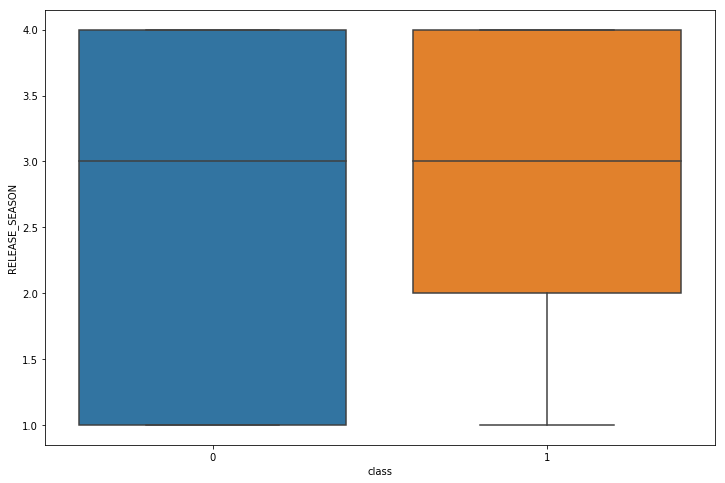

In [96]:
plt.figure(figsize=(12, 8))
sns.boxplot(y="RELEASE_SEASON", x="class", data=df_study)

In [97]:
df_fn["RELEASE_SEASON"].describe()

count    1079.000000
mean        2.475440
std         1.110374
min         1.000000
25%         1.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: RELEASE_SEASON, dtype: float64

In [98]:
df_fp["RELEASE_SEASON"].describe()

count    604.000000
mean       2.567881
std        1.179016
min        1.000000
25%        1.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: RELEASE_SEASON, dtype: float64

In [99]:
train_cols_v5 = train_cols_v4 + ["RELEASE_SEASON"]

             precision    recall  f1-score   support

          0       0.55      0.73      0.63      2108
          1       0.71      0.53      0.60      2641

avg / total       0.64      0.62      0.61      4749



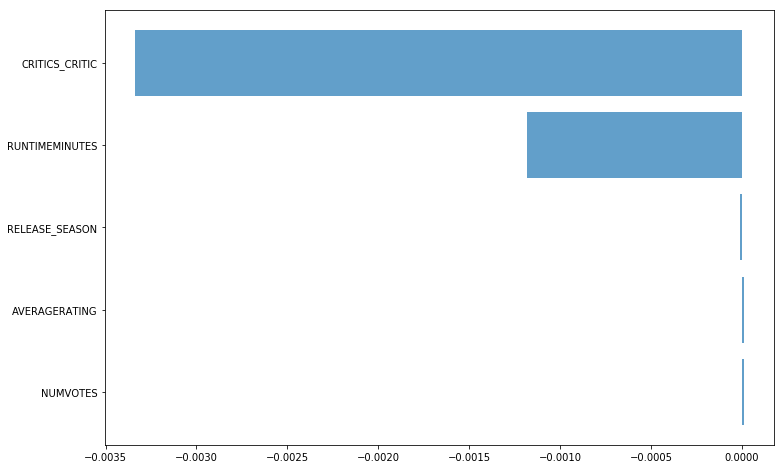

In [100]:
fifth_model, preds = evaluate_and_plot(df_study, train_cols_v5, Y)

In [101]:
train_cols_v6 = train_cols_v5 + ['BUDGET_IN_USD', 'AWARDS_NB_OSCAR_NOMINATIONS', 'AWARDS_NB_OSCAR_WON', 'AWARDS_NB_OTHER_NOMINATIONS', 'AWARDS_NB_OTHER_WINS']

             precision    recall  f1-score   support

          0       0.64      0.56      0.60      2108
          1       0.68      0.75      0.72      2641

avg / total       0.67      0.67      0.66      4749



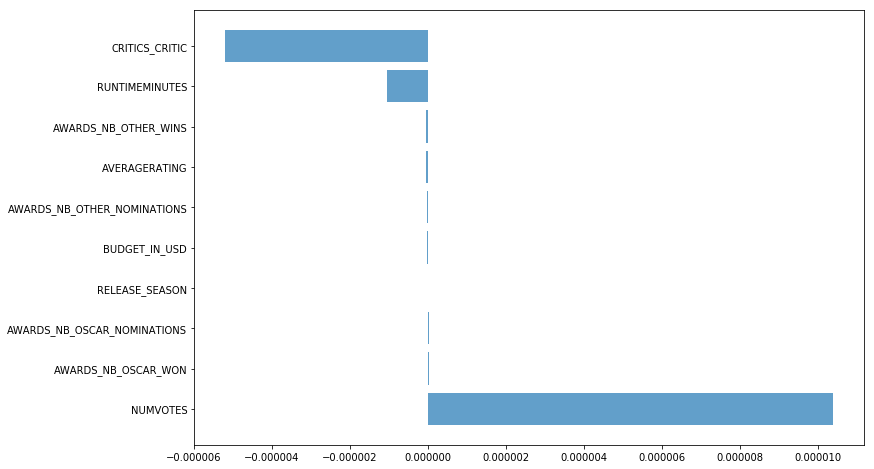

In [102]:
sixth_model, preds = evaluate_and_plot(df_study, train_cols_v6, Y)

## Avec un arbre de décision

In [103]:
def test_model(clf, df, cols, target_col, cv=5):
    prediction_data = df[cols]
    print(prediction_data.shape)
    prediction_data.fillna(0, inplace=True)
    prediction_target = np.array(df[target_col])
    preds = cross_val_predict(estimator=clf, X=prediction_data.as_matrix(), y=prediction_target, cv=cv)
    print(classification_report(prediction_target, preds))
    
    clf_trained = clf.fit(prediction_data.as_matrix(), prediction_target)
    return clf_trained

In [104]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=100, min_samples_leaf=100, presort=True)

In [105]:
DT_trained = test_model(DT, df=df_study, cols=train_cols_v6, target_col="class")

(4749, 10)
             precision    recall  f1-score   support

          0       0.59      0.53      0.56      2108
          1       0.65      0.71      0.68      2641

avg / total       0.63      0.63      0.63      4749



In [106]:
dict(zip(train_cols_v6, DT_trained.feature_importances_))

{'AVERAGERATING': 0.012462843088799554,
 'AWARDS_NB_OSCAR_NOMINATIONS': 0.0,
 'AWARDS_NB_OSCAR_WON': 0.023888124101654432,
 'AWARDS_NB_OTHER_NOMINATIONS': 0.033159045038776015,
 'AWARDS_NB_OTHER_WINS': 0.070571472083088019,
 'BUDGET_IN_USD': 0.24635552887967235,
 'CRITICS_CRITIC': 0.14945059789644483,
 'NUMVOTES': 0.4386289956999801,
 'RELEASE_SEASON': 0.0,
 'RUNTIMEMINUTES': 0.02548339321158467}

In [107]:
dot_ = export_graphviz(DT_trained, out_file=None, feature_names=train_cols_v6, filled=True, rounded=True,  
                         special_characters=True)

In [108]:
graph = graphviz.Source(dot_)

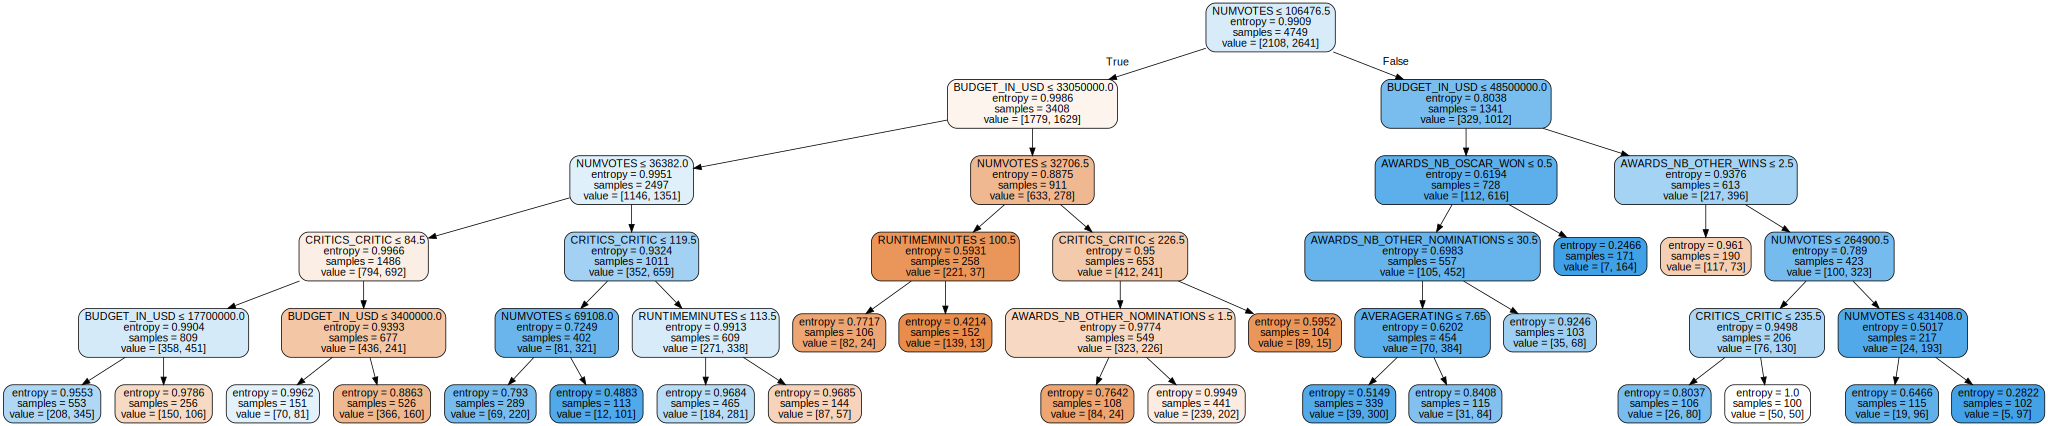

In [109]:
graph

In [110]:
dot_ = export_graphviz(DT_trained, out_file="Decision_tree_20171208.dot", feature_names=train_cols_v6, filled=True, rounded=True,  
                         special_characters=True)

# Textmining

In [104]:
tconst_to_synopsis = df["_SYNOPSIS"].to_dict()
tconst_to_storyline = df["_STORYLINE"].to_dict()

## Introduction à  spacy

In [105]:
import spacy
import en_core_web_lg

In [106]:
nlp_en = en_core_web_lg.load()

In [107]:
explore_object(tconst_to_synopsis)

('tt0872230',
 'A serial killer returns to his hometown to stalk seven children who share the same birthday as the date he was allegedly put to rest.')

In [108]:
def normalize_text(text):
    return text.replace("\n", " ").replace("\ufeff1", " ").strip()

In [158]:
doc = nlp_en(normalize_text(explore_object(tconst_to_synopsis)[1]))

In [159]:
doc

A veteran policeman, Murtaugh, is partnered with a younger, suicidal officer, Riggs. They both have one thing in common: hating working in pairs. Now they must learn to work with one another to stop a gang of drug smugglers.

In [162]:
for idx, token in enumerate(doc):
    print(idx, token.text, token.lemma_, token.tag_)

0 A a DT
1 veteran veteran JJ
2 policeman policeman NN
3 , , ,
4 Murtaugh murtaugh NNP
5 , , ,
6 is be VBZ
7 partnered partner VBN
8 with with IN
9 a a DT
10 younger young JJR
11 , , ,
12 suicidal suicidal JJ
13 officer officer NN
14 , , ,
15 Riggs riggs NNP
16 . . .
17 They -PRON- PRP
18 both both DT
19 have have VBP
20 one one CD
21 thing thing NN
22 in in IN
23 common common JJ
24 : : :
25 hating hate VBG
26 working work VBG
27 in in IN
28 pairs pair NNS
29 . . .
30 Now now RB
31 they -PRON- PRP
32 must must MD
33 learn learn VB
34 to to TO
35 work work VB
36 with with IN
37 one one CD
38 another another DT
39 to to TO
40 stop stop VB
41 a a DT
42 gang gang NN
43 of of IN
44 drug drug NN
45 smugglers smuggler NNS
46 . . .


In [112]:
for idx, tok in enumerate(doc):
    print(idx, tok.text, tok.lemma_, "||", tok.pos_)

0 In in || ADP
1 his -PRON- || ADJ
2 homeland homeland || NOUN
3 of of || ADP
4 Alagaesia alagaesia || PROPN
5 , , || PUNCT
6 a a || DET
7 farm farm || NOUN
8 boy boy || NOUN
9 happens happen || VERB
10 upon upon || ADP
11 a a || DET
12 dragon dragon || NOUN
13 's have || PART
14 egg egg || NOUN
15 -- -- || PUNCT
16 a a || DET
17 discovery discovery || NOUN
18 that that || ADJ
19 leads lead || VERB
20 him -PRON- || PRON
21 on on || ADP
22 a a || DET
23 predestined predestine || ADJ
24 journey journey || NOUN
25 where where || ADV
26 he -PRON- || PRON
27 realizes realize || VERB
28 he -PRON- || PRON
29 's have || VERB
30 the the || DET
31 one one || NUM
32 person person || NOUN
33 who who || NOUN
34 can can || VERB
35 defend defend || VERB
36 his -PRON- || ADJ
37 home home || NOUN
38 against against || ADP
39 an a || DET
40 evil evil || ADJ
41 king king || NOUN
42 . . || PUNCT


PROPN : nom propre
CCONJ : conjonction de coordination
X : autre (type email, etc...)
SPACE : espace
PUNCT : ponctuation
PRON : Pronom
DET : déterminant
ADP : type conjonction 
PART : particule
NUM : Cardinal

In [113]:
exclude_tags = set(["PROPN", "CCONJ", "X", "SPACE", "PUNCT", "-PRON-", "DET", "ADP", "PART", "NUM"])

## Tokenization, lemmatization et construction du bag-of-words

In [114]:
MATRIX_TEXT_PREFIX = "TEXT_"
LEMMA_MIN_LENGTH = 3

In [115]:
def build_document_frequency(doc):
    lemma_to_count = defaultdict(int)
    for idx, token in enumerate(doc):
        if token.pos_ not in exclude_tags:
            if token.lemma_ == "-PRON-" or len(token.lemma_) < LEMMA_MIN_LENGTH:
                continue
            lemma_to_count[MATRIX_TEXT_PREFIX + token.lemma_] += 1
    return lemma_to_count

In [116]:
def build_corpus(list_of_texts):
    corpus = list()
    for text in tqdm(list_of_texts):
        if len(text):
            # Normalisation
            norm_text = normalize_text(text)
            # Tokenization & Lemmatization
            doc = nlp_en(norm_text)
            # Calcul des Occurences
            doc_frequency = build_document_frequency(doc)
            corpus.append(doc_frequency)
        else:
            corpus.append({})
    return corpus

In [117]:
corpus = build_corpus(df_study["_SYNOPSIS"])

100%|██████████| 4749/4749 [01:19<00:00, 59.60it/s]


### Chargement en matrice

In [118]:
text_vect = DictVectorizer()

In [119]:
tf_matrix = text_vect.fit_transform(corpus)

In [170]:
sum(tf_matrix[0,:].todense().A1)

13.0

In [163]:
tf_matrix.shape

(4749, 4204)

In [121]:
tf_matrix

<4749x7026 sparse matrix of type '<class 'numpy.float64'>'
	with 62123 stored elements in Compressed Sparse Row format>

In [171]:
# garder uniquement les features qui apparaissent sur au moins 2 documents
text_features_to_keep = np.where(tf_matrix.astype(np.bool).sum(axis=0).A1 > 1)[0]
tf_matrix = tf_matrix[:, text_features_to_keep]
text_vec_feature_names = np.array(text_vect.feature_names_)[text_features_to_keep]

In [172]:
tf_matrix.shape

(4749, 4204)

## Exploration de la matrice

In [124]:
def get_tag_cloud(matrix, star_id, crew_type, max_words=20, blacklist=[]):
    indices = set()
    for col in df_study.columns:
        if col.startswith(crew_type):
            idx_ = [df_study.index.get_loc(i) for i in df_study[df_study[col] == star_id].index.tolist()]
            indices = indices | set(idx_)
    print("FOUND %d movies" % len(indices))
    sub_matrix = matrix[list(indices),:].sum(axis=0).A1
    ordered_features_idx = np.flipud(np.argsort(sub_matrix))[:max_words]
    best_features = text_vec_feature_names[ordered_features_idx]
    best_features = [feature for feature in best_features if feature not in blacklist]
    return dict(zip(list(best_features), sub_matrix[ordered_features_idx])), [t.split("_")[1] for t in best_features]

In [125]:
tarantino = "nm0000233"

In [126]:
print(get_tag_cloud(tf_matrix, tarantino, "DIRECTOR", 30)[1])

FOUND 7 movies
['hunter', 'bounty', 'middle', 'vengeance', 'wife', 'find', 'team', 'brutal', 'slave', 'now', 'redemption', 'tale', 'once', 'nefarious', 'part', 'german', 'winter', 'life', 'profit', 'begin', 'treacherous', 'will', 'criminal', 'that', 'who', 'eye', 'character', 'help', 'lover', 'child']


In [127]:
nolan = "nm0634240"

In [128]:
print(get_tag_cloud(tf_matrix, nolan, "DIRECTOR", 40)[1]) #Christopher Nolan

FOUND 10 movies
['who', 'battle', 'fight', 'have', 'thief', 'must', 'illusion', 'begin', 'train', 'give', 'take', 'term', 'steal', 'set', 'corporate', 'past', 'tragic', 'humanity', 'when', 'sacrifice', 'where', 'allied', 'material', 'ride', 'german', 'murderer', 'chaos', 'brutal', 'murder', 'magician', 'edge', 'wife', 'mentor', 'havoc', 'obstacle', 'follow', 'dark', 'enigmatic', 'fierce', 'now']


In [129]:
scorsese = "nm0000217"

In [130]:
print(get_tag_cloud(tf_matrix, scorsese, "DIRECTOR", 30)[1]) #Martin Scorsese

FOUND 22 movies
['life', 'who', 'year', 'attempt', 'other', 'night', 'young', 'woman', 'fast', 'mafia', 'work', 'have', 'tale', 'father', 'singer', 'century', 'make', 'aspire', 'stalk', 'lawyer', 'late', 'save', 'meet', 'which', 'mob', 'even', 'live', 'journey', 'story', 'show']


In [131]:
def get_genre_cloud(matrix, genre, max_words=20, blacklist=[]):
    indices = [df_study.index.get_loc(i) for i in df_study[df_study[genre] == 1].index.tolist()]
    sub_matrix = matrix[indices,:]
    feature_sum = sub_matrix.sum(axis=0).A1
    ordered_features_idx = np.flipud(np.argsort(feature_sum))[:max_words]
    best_features = text_vec_feature_names[ordered_features_idx]
    best_features = [feature for feature in best_features if feature not in blacklist]
    return dict(zip(list(best_features), feature_sum[ordered_features_idx])), [t.split("_")[1] for t in best_features]

In [173]:
print(get_genre_cloud(tf_matrix, "IS_DRAMA", max_words=100)[1])

['needlessly', 'devoid', 'nose', 'enthusiastic', 'exclusive', 'near', 'crusader', 'newsman', 'courier', 'archaeological', 'length', 'epic', 'mariner', 'establishment', 'macho', 'day', 'north', 'mid-1940s', 'nemesis', 'deduce', 'defeat', 'knee', 'dig', 'fianceé', 'crasher', 'coup', 'instability', 'frantic', 'night', 'attract', 'fleet', 'nightly', 'food', 'nearly', 'cash', 'cybertronian', 'feudal', 'dimwitted', 'fiercely', 'mid-1990', 'exact', 'clairvoyant', 'introduce', 'lifeguard', 'feminist', 'bogus', 'casino', 'enlightenment', 'avenge', 'adversity', 'extortionist', 'game', 'meanwhile', 'nerdy', 'crossword', 'benefactor', 'disastrous', 'depressed', 'colonist', 'freak', 'necessary', 'amok', 'idealist', 'fulfillment', 'arise', 'jury', 'make', 'daft', 'bait', 'grower', 'enroll', 'catastrophic', 'materialism', 'frog', 'film', 'lifelong', 'myriad', 'naval', 'matter', 'glory', 'businessman', 'narrate', 'emotionally', 'dissociative', 'inauguration', 'bedtime', 'anthropologist', 'erratic', 'm

## Identification des stop words

In [133]:
(tf_matrix.astype(np.bool).sum(axis=0) > 100).A1

array([False, False, False, ..., False, False, False], dtype=bool)

In [134]:
most_common_words = text_vec_feature_names[(tf_matrix.astype(np.bool).sum(axis=0) > 100).A1]

In [135]:
most_common_words

array(['TEXT_agent', 'TEXT_american', 'TEXT_attempt', 'TEXT_back',
       'TEXT_become', 'TEXT_begin', 'TEXT_boy', 'TEXT_brother', 'TEXT_can',
       'TEXT_child', 'TEXT_come', 'TEXT_couple', 'TEXT_daughter',
       'TEXT_day', 'TEXT_death', 'TEXT_discover', 'TEXT_fall',
       'TEXT_family', 'TEXT_father', 'TEXT_fight', 'TEXT_find',
       'TEXT_force', 'TEXT_former', 'TEXT_friend', 'TEXT_get', 'TEXT_girl',
       'TEXT_group', 'TEXT_have', 'TEXT_help', 'TEXT_high', 'TEXT_home',
       'TEXT_kill', 'TEXT_killer', 'TEXT_lead', 'TEXT_learn', 'TEXT_leave',
       'TEXT_life', 'TEXT_live', 'TEXT_look', 'TEXT_love', 'TEXT_make',
       'TEXT_man', 'TEXT_meet', 'TEXT_mother', 'TEXT_much', 'TEXT_murder',
       'TEXT_must', 'TEXT_mysterious', 'TEXT_new', 'TEXT_not', 'TEXT_old',
       'TEXT_only', 'TEXT_order', 'TEXT_other', 'TEXT_own', 'TEXT_plan',
       'TEXT_police', 'TEXT_return', 'TEXT_save', 'TEXT_school',
       'TEXT_secret', 'TEXT_send', 'TEXT_set', 'TEXT_small', 'TEXT_son',
      

In [136]:
print(get_genre_cloud(tf_matrix, "IS_DRAMA", max_words=120, blacklist=most_common_words)[1])

['drug', 'relationship', 'people', 'husband', 'change', 'search', 'age', 'crime', 'city', 'job', 'base', 'sister', 'involve', 'marry', 'journey', 'college', 'decide', 'officer', 'know', 'start', 'parent', 'move', 'escape', 'whose', 'lose', 'investigate', 'past', 'local', 'soldier', 'kidnap', 'true']


## Normalisation par TF IDF

In [137]:
tfidf = TfidfTransformer()

In [138]:
tfidf = tfidf.fit(tf_matrix)

In [139]:
tfidf_matrix = tfidf.transform(tf_matrix)

In [140]:
tfidf_matrix.shape

(4749, 4204)

### Différence de tag cloud

In [141]:
sorted(get_tag_cloud(tf_matrix, tarantino, "DIRECTOR", 20)[0].items(), key=lambda x: x[1], reverse=True)

FOUND 7 movies


[('TEXT_wife', 2.0),
 ('TEXT_bounty', 2.0),
 ('TEXT_vengeance', 2.0),
 ('TEXT_find', 2.0),
 ('TEXT_hunter', 2.0),
 ('TEXT_middle', 2.0),
 ('TEXT_team', 2.0),
 ('TEXT_brutal', 1.0),
 ('TEXT_now', 1.0),
 ('TEXT_nefarious', 1.0),
 ('TEXT_slave', 1.0),
 ('TEXT_german', 1.0),
 ('TEXT_part', 1.0),
 ('TEXT_winter', 1.0),
 ('TEXT_once', 1.0),
 ('TEXT_begin', 1.0),
 ('TEXT_life', 1.0),
 ('TEXT_tale', 1.0),
 ('TEXT_redemption', 1.0),
 ('TEXT_profit', 1.0)]

In [142]:
#now recalé loins derrière
sorted(get_tag_cloud(tfidf_matrix, tarantino, "DIRECTOR", 20)[0].items(), key=lambda x: x[1], reverse=True)

FOUND 7 movies


[('TEXT_vengeance', 0.6134115189075946),
 ('TEXT_bounty', 0.58865937516463762),
 ('TEXT_hunter', 0.54160453190080504),
 ('TEXT_middle', 0.52476511850396801),
 ('TEXT_wife', 0.40418215651863421),
 ('TEXT_bouncer', 0.40156173985468968),
 ('TEXT_jewelry', 0.38814554475416591),
 ('TEXT_team', 0.38608634618882659),
 ('TEXT_profit', 0.38032244438521007),
 ('TEXT_plantation', 0.37909407148256702),
 ('TEXT_treacherous', 0.37704626532542107),
 ('TEXT_terribly', 0.36866693598224043),
 ('TEXT_informant', 0.3612615126196943),
 ('TEXT_diner', 0.3612603723846548),
 ('TEXT_cost', 0.34769468442123019),
 ('TEXT_reclusive', 0.34378083920060304),
 ('TEXT_currently', 0.34193806043924407),
 ('TEXT_slave', 0.34089934394047722),
 ('TEXT_simple', 0.33954807484153487),
 ('TEXT_huge', 0.33719089181558398)]

# Nouvelles Prédictions 

In [143]:
from sklearn.svm import LinearSVC

In [144]:
svm = LinearSVC()

In [145]:
tfidf_matrix.shape

(4749, 4204)

In [146]:
Y.shape

(4749,)

In [147]:
svm, svm_predictions = evaluate_model(svm, tfidf_matrix, Y)

             precision    recall  f1-score   support

          0       0.46      0.43      0.45      2108
          1       0.57      0.60      0.58      2641

avg / total       0.52      0.52      0.52      4749



In [148]:
def interprete_prediction(movie_id):
    idx = movie_ids.index(movie_id)
    explanations = np.multiply(tfidf_matrix[idx,:].todense().A.ravel(), svm.coef_.T.ravel()).tolist()
    explanations = sorted(enumerate(explanations), key=lambda x: math.fabs(x[1]), reverse=True)[:20]
    return {text_vec_feature_names[item[0]]: item[1] for item in explanations if math.fabs(item[1] > 0)}

In [149]:
interprete_prediction("tt5013056") # Dunkerque

{'TEXT_allied': 0.351565373411031,
 'TEXT_evacuate': 0.14392149383093086,
 'TEXT_fierce': 0.052613292325407186,
 'TEXT_german': 0.09196836007605477,
 'TEXT_surround': 0.14904723134941694}

In [150]:
svm_predictions[movie_ids.index("tt5013056")]

1

In [158]:
interprete_prediction("tt0407887") # Les inflitrés, avec DiCaprio, Jack Nicholson 

{'TEXT_identify': 0.2649932492921411, 'TEXT_undercover': 0.34798020885685976}

In [159]:
svm_predictions[movie_ids.index("tt0407887")]

0

In [160]:
corpus[movie_ids.index("tt0407887")]

defaultdict(int,
            {'TEXT_attempt': 1,
             'TEXT_cop': 1,
             'TEXT_gang': 1,
             'TEXT_identify': 1,
             'TEXT_infiltrate': 1,
             'TEXT_irish': 1,
             'TEXT_mole': 1,
             'TEXT_other': 1,
             'TEXT_police': 1,
             'TEXT_undercover': 1})

In [161]:
df_study.loc["tt0407887"]["class"]

1

In [162]:
sorted_coefs = sorted(enumerate(svm.coef_.ravel()), key=lambda x: x[1])
most_discriminant_negative_features = sorted_coefs[:30]
most_discriminant_positive_features = sorted_coefs[-30:]

In [163]:
feature_coefs = {text_vec_feature_names[item[0]]: item[1] for item in most_discriminant_negative_features}
feature_coefs.update({text_vec_feature_names[item[0]]: item[1] for item in most_discriminant_positive_features})

In [164]:
def plot_svm_feature_coefs(feature_dict):
    plt.figure(figsize=(20, 12))
    order_ = np.flipud(np.argsort(np.array(list(feature_dict.values()))))
    imp = sorted(list(feature_dict.values()), reverse=True)
    tick_labels = np.array(list(feature_dict.keys()))[order_]
    plt.barh(range(len(feature_dict)), imp, tick_label=tick_labels, alpha=0.7)

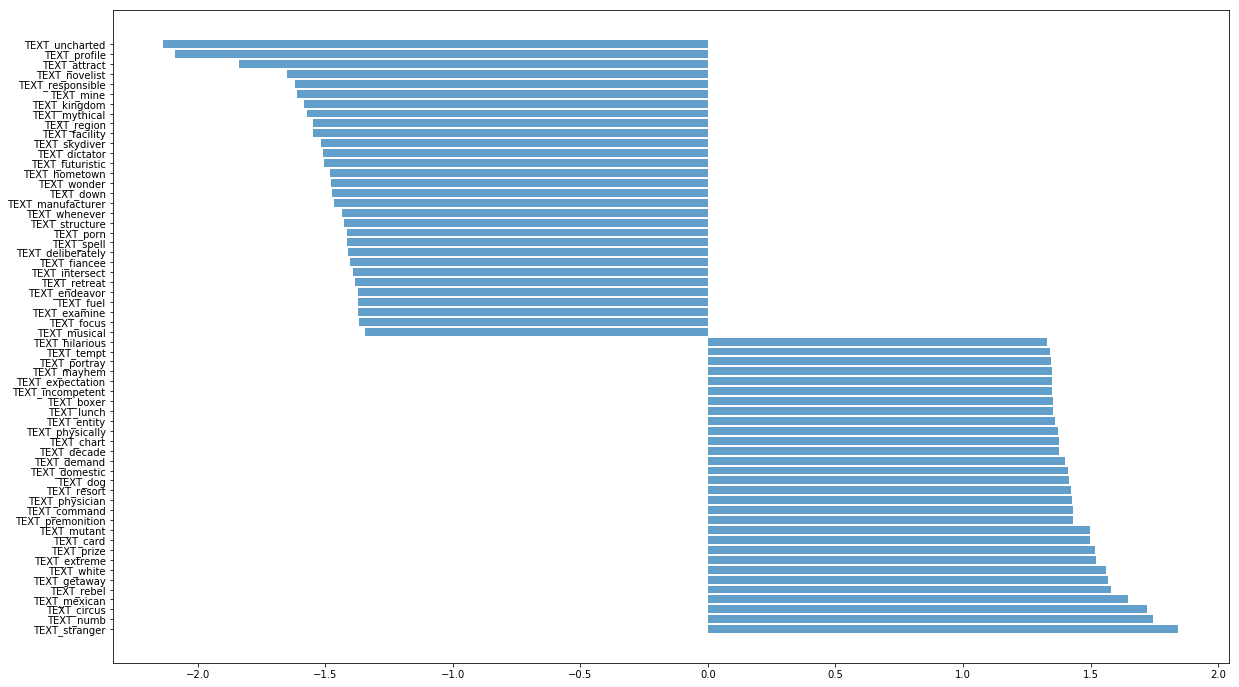

In [165]:
plot_svm_feature_coefs(feature_coefs)